In [3]:
import torch
from diffusers import AutoencoderKL
from elatentlpips import ELatentLPIPS

# Load the VAE encoder and decoder from the FLUX model
# If you want to use the latest FLUX encoder, please ensure that you update your diffusers package to the latest version:
# 'pip install --upgrade diffusers[torch]'
# vae = AutoencoderKL.from_pretrained("black-forest-labs/FLUX.1-dev", subfolder="vae").to("cuda")
vae = AutoencoderKL.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5", subfolder="vae").to("cuda")

# Initialize E-LatentLPIPS with the specified encoder model (options: sd15, sd21, sdxl, sd3, flux)
# The 'augment' parameter can be set to one of the following: b, bg, bgc, bgco
elatentlpips = ELatentLPIPS(encoder="sd15", augment='bg').to("cuda").eval()

# Generate random images (ensure images are RGB and normalized to the range [-1, 1])
image0 = torch.zeros(1, 3, 512, 512).to("cuda")  # First image (RGB, normalized)
image1 = torch.zeros(1, 3, 512, 512).to("cuda")  # Second image (RGB, normalized)

# Encode the images into the latent space using the VAE
latent0 = vae.encode(image0).latent_dist.sample()  # Encoded latent for image0
latent1 = vae.encode(image1).latent_dist.sample()  # Encoded latent for image1

# Compute the perceptual distance between the two latent representations
# Note: Set `normalize=True` if the latents (latent0 and latent1) are not already normalized 
# by `vae.config.scaling_factor` and `vae.config.shift_factor`.
distance = elatentlpips(latent0, latent1, normalize=True).mean()

Setting up [ELatentLPIPS] perceptual loss: trunk [vgg16], spatial [off]


/local/kunkim/miniconda3/envs/textboost/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/local/kunkim/miniconda3/envs/textboost/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
100%|██████████| 1.03G/1.03G [01:05<00:00, 16.8MB/s]
/local/kunkim/miniconda3/envs/textboost/lib/python3.11/site-packages/elatentlpips/vgg16.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytor

Loading VGG16bn-base from: https://huggingface.co/Mingguksky/elatentlpips/resolve/main/elatentlpips_ckpt/sd15_latent_vgg16.pth.tar | Top-1 acc.: 69.906


100%|██████████| 56.2M/56.2M [00:04<00:00, 12.6MB/s]
/local/kunkim/miniconda3/envs/textboost/lib/python3.11/site-packages/elatentlpips/elatentlpips.py:139: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to 

Loading linear heads from: https://huggingface.co/Mingguksky/elatentlpips/resolve/main/elatentlpips_ckpt/sd15_latest_vgg16_tuned.pth


In [ ]:
from diffusers import DiffusionPipeline
from PIL import Image

pipe = DiffusionPipeline.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5",
    safety_checker=None,
).to("cuda")

Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00, 10.26it/s]
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


100%|██████████| 50/50 [00:07<00:00,  6.98it/s]


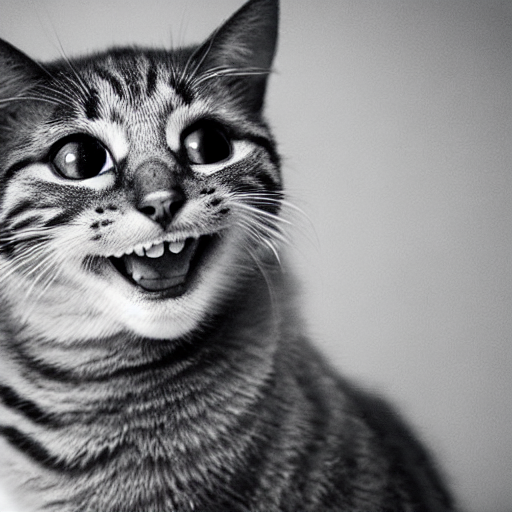

In [5]:
pipe(prompt="a smiling cat, grayscale").images[0]